In [1335]:
# import autograd-wrapped numpy
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad, hessian


# datapath to data
datapath = '../mlrefined_datasets/superlearn_datasets/'

# Exercise 6.12. The regularized Softmax

11 of 11 is correct, with a accuracy of 1.0


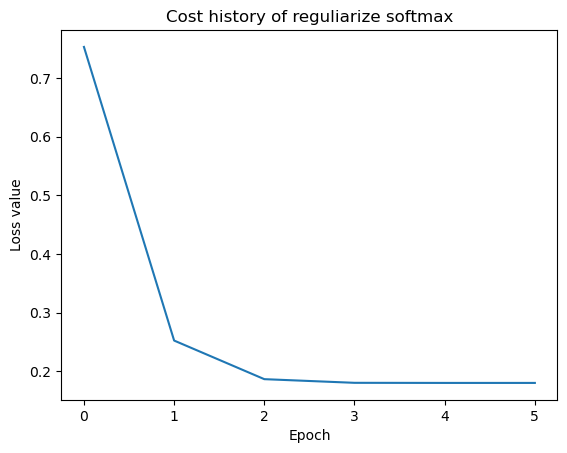

In [1336]:
# load in dataset
csvname = datapath + '2d_classification_data_v1.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:].T
y = data[-1:,:].T 
x = np.concatenate([np.ones(x.shape), x], 1)



def softmax_reg(w, x, y, lamb):

    softmax = np.log(1 + np.exp(-y * x@w)).mean()
    reg = (lamb * w.T@w).sum()

    return softmax + reg



softmax_reg_grad = grad(softmax_reg)
softmax_reg_hess = hessian(softmax_reg)


w = np.ones((2, 1))
epoch = 5
lamb = 1e-3
cost_hist = [softmax_reg(w, x, y, lamb)]

for _ in range(epoch):
    first = softmax_reg_grad(w, x, y, lamb)
    second = softmax_reg_hess(w, x, y, lamb).squeeze()
    w = np.linalg.solve(second, second @ w - first) 
    cost_hist.append(softmax_reg(w, x, y, lamb))





plt.plot(np.arange(len(cost_hist)), cost_hist)
plt.xlabel("Epoch")
plt.ylabel("Loss value")
plt.title("Cost history of reguliarize softmax")

acc = (np.sign(x@w) == y).sum()
print(f"{acc} of {x.shape[0]} is correct, with a accuracy of {acc / x.shape[0]}")



# Exercise 6.13. Compare the efficacy of two-class cost functions I

Below we load in the breast cancer dataset -  [a description of which you can find here](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)).  The input datapoints are stacked *column-wise* in this dataset, with the final row being the label of each point.

Loss : percept
676 of 699 is correct, with a accuracy of 0.9670958512160229
Misclassification : 23

Loss : softmax
670 of 699 is correct, with a accuracy of 0.9585121602288984
Misclassification : 29



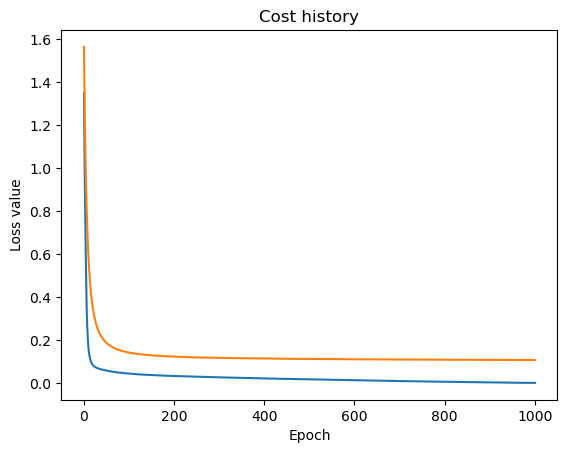

In [1342]:
# data input
csvname = datapath + 'breast_cancer_data.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data[:-1,:].T
y = data[-1:,:].T
x_mean = x.mean(0, keepdims=True)
x_std = x.std(0, keepdims=True)
x = (x - x_mean) / x_std

x = np.concatenate((np.ones((x.shape[0], 1)), x), 1)


def percept_loss(w, x, y):

    return np.maximum(-y * (x@w), 0).mean() 


def softmax_loss(w, x, y):
    return (np.log(1 + np.exp(-y * x@w))).mean()


losses = [("percept", percept_loss), ("softmax", softmax_loss)]
epochs = 1000
alpha = 0.1
w_init = np.random.randn(x.shape[1], 1)
for name, loss in losses:
    gra = grad(loss)
    w = w_init.copy()
    cost_hist = [loss(w, x, y)]
    for _ in range(epochs):
        w -= alpha * gra(w, x, y)
        cost_hist.append(loss(w, x, y))
    acc = (np.sign(x@w) == y).sum()
    print(f"Loss : {name}")
    print(f"{acc} of {x.shape[0]} is correct, with a accuracy of {acc / x.shape[0]}")
    print(f"Misclassification : {x.shape[0] - acc}")
    print()
    plt.plot(np.arange(len(cost_hist)), cost_hist, label=name)
    plt.xlabel("Epoch")
    plt.ylabel("Loss value")
    plt.title("Cost history")


# Exercise 6.15. Credit check

764 of 1000 is correct, with a accuracy of 0.764


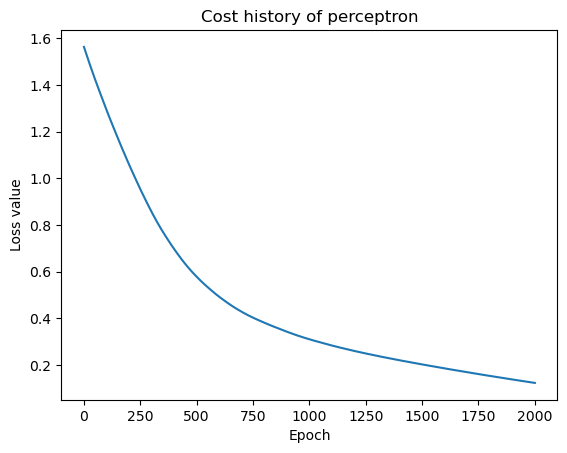

In [1345]:
# load in dataset
csvname = datapath + 'credit_dataset.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:].T
y = data[-1:,:].T

x_mean = x.mean(0, keepdims=True)
x_std = x.std(0, keepdims=True)
x = (x - x_mean) / x_std
x = np.concatenate([x, np.ones((x.shape[0], 1))], 1)




# Gradient of perceptron cost
def percept_loss(pred, y):
    # pred: Nx1
    # y: Nx1 

    return np.maximum(-y * pred, 0).mean()


def grad_percept(x, w, y):
    # w: kx1
    # x : Nxk
    # y : Nx1
    N, k = x.shape
    mask = -y * x@w > 0
    return (-y * x).T @ mask.astype(np.int32) / N




epoch = 2000
w = np.random.randn(x.shape[1], 1)
cost_hist = [percept_loss(x@w, y)]
alpha = 0.01


for i in range(epoch):
    w -= alpha * grad_percept(x, w, y)
    cost_hist.append(percept_loss(x@w, y))

plt.plot(np.arange(len(cost_hist)), cost_hist)
plt.xlabel("Epoch")
plt.ylabel("Loss value")
plt.title("Cost history of perceptron")

acc = (np.sign(x@w) == y).sum()
print(f"{acc} of {x.shape[0]} is correct, with a accuracy of {acc / x.shape[0]}")

# Exercise 6.16. Weighted classification and balanced accuracy

beta=1
accuracy of positive class is 0.6
accuracy of negative class is 0.98
accuracy of total is 0.79



beta=5
accuracy of positive class is 0.8
accuracy of negative class is 0.94
accuracy of total is 0.87

beta=10
accuracy of positive class is 1.0
accuracy of negative class is 0.92
accuracy of total is 0.96



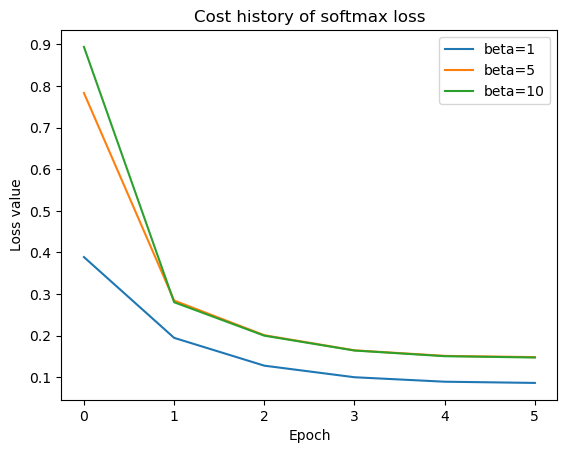

In [1339]:
# data input
csvname = datapath + '3d_classification_data_v2_mbalanced.csv'
data1 = np.loadtxt(csvname,delimiter = ',')
# get input and output of dataset
x = data1[:-1,:].T
y = data1[-1:,:].T 

x = np.concatenate([x, np.ones((x.shape[0], 1))], 1)



def softmax_loss(w, x, y, weight):
    # w : kx1
    # x : Nxk
    # y : Nx1
    return (np.log(1 + np.exp(-y * x@w)) * weight).sum()

softmax_grad = grad(softmax_loss)
softmax_hess = hessian(softmax_loss)

                                                                                                                             



epoch = 5
ws = []

weights = []
for i in (1, 5, 10):
    tmp = np.ones(y.shape)
    tmp[y == 1] = i
    tmp = tmp / tmp.sum()
    weights.append((i, tmp))

for i, weight in weights:
    w = np.random.randn(x.shape[1], 1)
    cost_hist = [softmax_loss(w, x, y, weight)]


    for _ in range(epoch):
        first = softmax_grad(w, x, y, weight)
        second = softmax_hess(w, x, y, weight).transpose(0, 2, 1,3).squeeze()
        w = np.linalg.solve(second, second @ w - first)
        cost_hist.append(softmax_loss(w, x, y, weight))

    ws.append((i, w.copy()))
    plt.plot(np.arange(len(cost_hist)), cost_hist, label=f"beta={i}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss value")
    plt.title(f"Cost history of softmax loss")
    plt.legend()



    acc_pos = ((y==1) * (np.sign(x@w) == y)).sum() / (y==1).sum()
    acc_neg = ((y==-1) * (np.sign(x@w) == y)).sum() / (y==-1).sum()
    print(f"beta={i}")
    print(f"accuracy of positive class is {acc_pos}")
    print(f"accuracy of negative class is {acc_neg}")
    print(f"accuracy of total is {(acc_neg + acc_pos) / 2}")
    print()



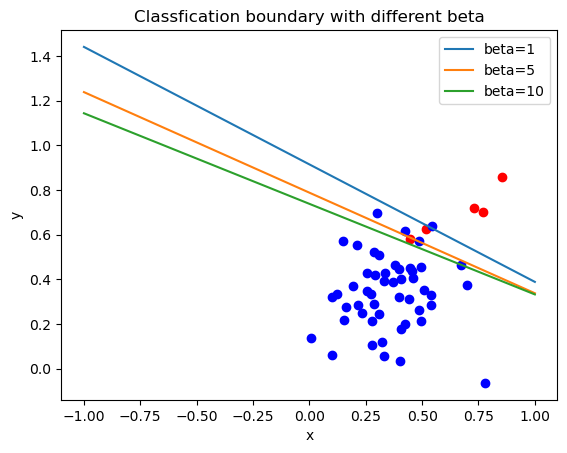

In [1340]:
# Plot 
plt.scatter(x[(y == 1)[:, 0]][:, 0], x[(y == 1)[:, 0]][:, 1], color="r")
plt.scatter(x[(y == -1)[:, 0]][:, 0], x[(y == -1)[:, 0]][:, 1], color="b")
for i, w in ws:
    y1, y2 = (-w[2]-w[0]*x1) / w[1], (-w[2]-w[0]*x2) / w[1]
    plt.plot([x1, x2], [y1, y2], label=f"beta={i}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Classfication boundary with different beta")
plt.legend()
    